# Explaratory Data Anaylsis

In [22]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pointbiserialr
from scipy.stats import ks_2samp


In [2]:
data = pd.read_csv("/Users/rohith/Desktop/fraud-detection-ml/Data/creditcard.csv")

In [3]:
# Data overview
data.head()
data.shape
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
# Check for missing data
print(data.isna().sum())
print(f"Duplicates: {data.duplicated().sum()}")

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicates: 1081


We have 1081 duplicate rows, so I will drop them to avoid bias

In [5]:
# duplicates by class
dup_counts = data[data.duplicated(keep=False)].groupby('Class').size()
print(dup_counts)

Class
0    1822
1      32
dtype: int64


In [6]:
data = data.drop_duplicates()

# check duplicates
print(f"Duplicates: {data.duplicated().sum()}")
dup_counts = data[data.duplicated(keep=False)].groupby('Class').size()
print(dup_counts)

Duplicates: 0
Series([], dtype: int64)


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


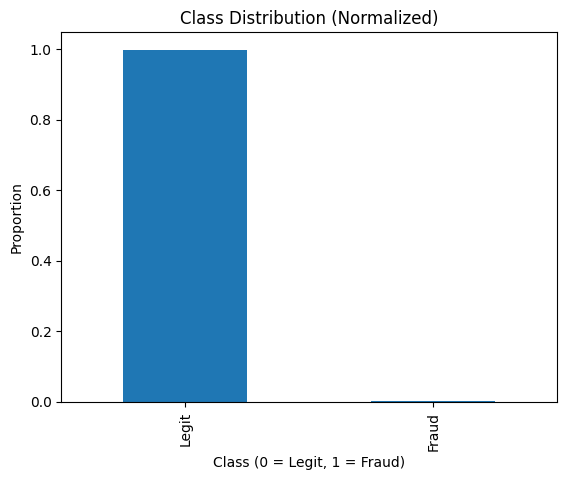

In [7]:
# Count fraud vs not
counts = data['Class'].value_counts(normalize=True)
print(counts)

#plot
plt.figure()
counts.plot(kind='bar')
plt.title('Class Distribution (Normalized)')
plt.xlabel('Class (0 = Legit, 1 = Fraud)')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Legit', 'Fraud'])
plt.show()

We have significantly more legit transactions than fraud, so we will have to handle that properly. Using techniques such as resampling, class weights, and model selection should mitigate the effects.

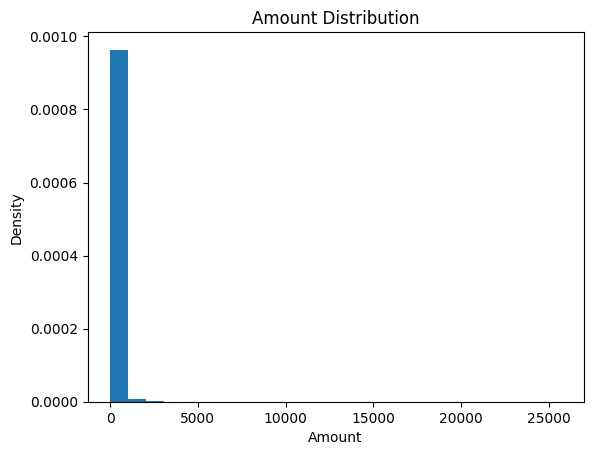

In [8]:
# Transaction amount distribution
plt.figure()
plt.hist(data["Amount"], bins=25, density=True)
plt.title(f'{"Amount"} Distribution')
plt.xlabel("Amount")
plt.ylabel('Density')
plt.show()

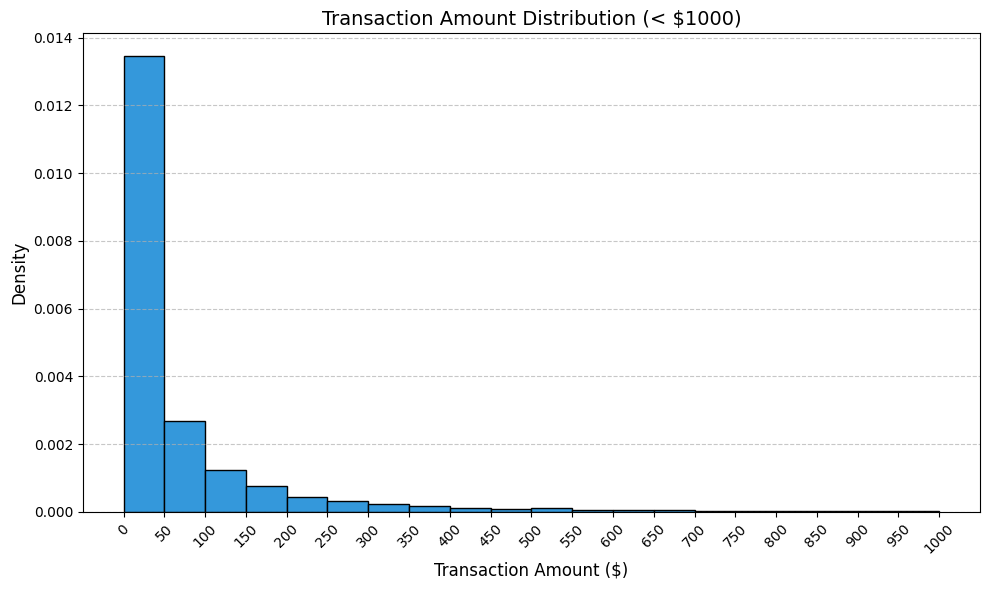

In [9]:
# most data is less than 1000, so eliminate outlier amounts
filtered = data[data["Amount"] < 1000]["Amount"]

bins = np.arange(0, 1000 + 50, 50) 

# Plot
plt.figure(figsize=(10, 6))
plt.hist(filtered, bins=bins, density=True, edgecolor='black', color='#3498db')
plt.title("Transaction Amount Distribution (< $1000)", fontsize=14)
plt.xlabel("Transaction Amount ($)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(bins, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
# Check fraud based on amount, using pearson correlation
corr = data['Amount'].corr(data['Class'])
print(f"Correlation between Amount and Fraud (Class): {corr:.4f}")

Correlation between Amount and Fraud (Class): 0.0058


The correlation is less than 0.1 so larger amounts do not appear to have more fraud

           Amount_bin  Fraud_Rate
0       (-0.001, 1.0]    0.005638
1         (1.0, 3.58]    0.000975
2        (3.58, 8.92]    0.001276
3       (8.92, 13.04]    0.000460
4       (13.04, 22.0]    0.000492
5       (22.0, 37.07]    0.000566
6       (37.07, 59.9]    0.000806
7       (59.9, 100.0]    0.001716
8     (100.0, 203.38]    0.001534
9  (203.38, 25691.16]    0.002890


/var/folders/82/87xd0yg57r1gc_vh3xv9zrlw0000gn/T/ipykernel_159/598842735.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby('Amt_bin')['Class'].mean().reset_index()


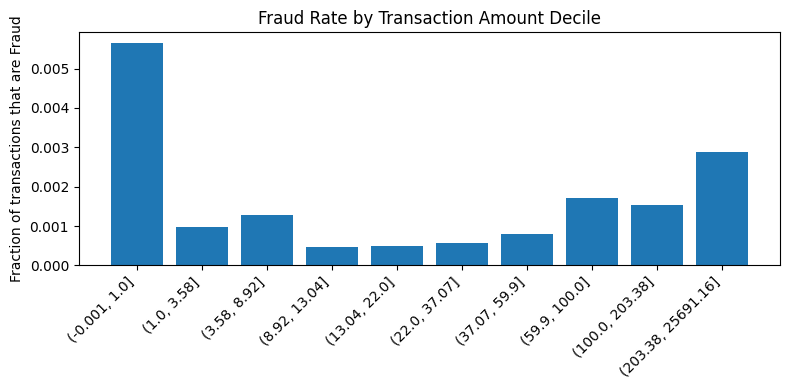

In [11]:
# Check fraud rate by amount bins
data['Amt_bin'] = pd.qcut(data['Amount'], q=10)

# Compute fraud rate per bin
fraud_rate = data.groupby('Amt_bin')['Class'].mean().reset_index()
fraud_rate.columns = ['Amount_bin', 'Fraud_Rate']

print(fraud_rate)

plt.figure(figsize=(8,4))
plt.bar(range(len(fraud_rate)), fraud_rate['Fraud_Rate'])
plt.xticks(range(len(fraud_rate)), fraud_rate['Amount_bin'].astype(str), rotation=45, ha='right')
plt.ylabel('Fraction of transactions that are Fraud')
plt.title('Fraud Rate by Transaction Amount Decile')
plt.tight_layout()
plt.show()


In [12]:
# outliers
numeric_feats = data.select_dtypes(include=[np.number]).columns.drop('Class')

# Compute IQR fences and count outliers
outlier_summary = []
for feat in numeric_feats:
    Q1 = data[feat].quantile(0.25)
    Q3 = data[feat].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    n_out = data[(data[feat] < lower_fence) | (data[feat] > upper_fence)].shape[0]
    outlier_summary.append({
        'feature': feat,
        'lower_fence': lower_fence,
        'upper_fence': upper_fence,
        'outlier_count': n_out
    })

outliers_df = pd.DataFrame(outlier_summary).set_index('feature')
print(outliers_df.sort_values('outlier_count', ascending=False))


          lower_fence    upper_fence  outlier_count
feature                                            
V27         -0.313414       0.333982          38799
Amount    -102.265000     185.375000          31685
V28         -0.249459       0.274917          30094
V20         -0.728484       0.650222          27553
V8          -1.010627       1.127502          23904
V6          -2.517765       2.145527          22886
V23         -0.625881       0.611926          18467
V12         -1.940959       2.151738          15282
V21         -0.850053       0.807941          14401
V14         -1.802834       1.869438          14060
V2          -2.701226       2.901188          13390
V5          -2.642901       2.565290          12221
V4          -3.234807       3.124319          11094
V19         -1.828484       1.830703          10150
V10         -2.019373       1.937414           9345
V7          -2.236984       2.254949           8839
V9          -2.504517       2.456273           8199
V16         

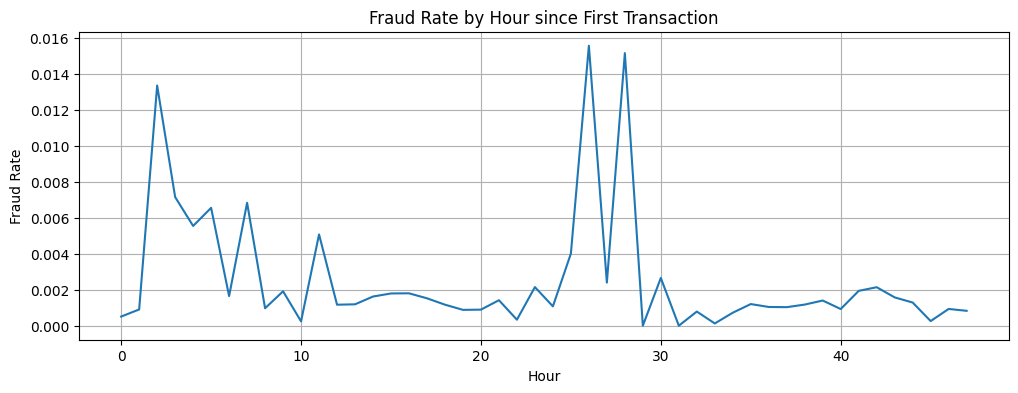

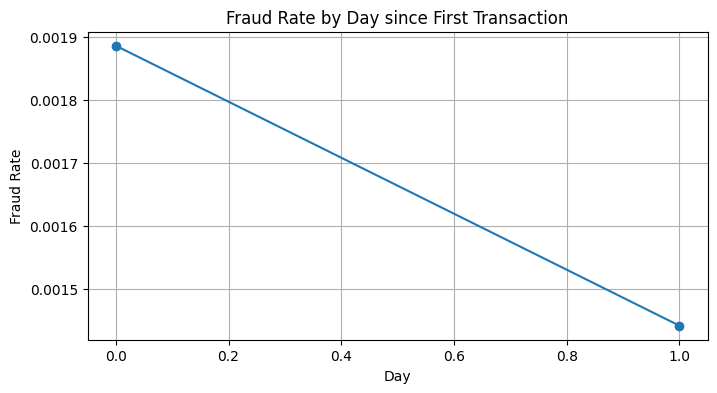

In [13]:
# Check fraud as time goes on

data['hour'] = data['Time'] // 3600                       
data['day']  = data['Time'] // (3600 * 24)                

# Fraud rate per bucket
hourly_rate = data.groupby('hour')['Class'].mean()
daily_rate  = data.groupby('day')['Class'].mean()

# Plot hourly fraud rate
plt.figure(figsize=(12,4))
hourly_rate.plot(kind='line')
plt.title('Fraud Rate by Hour since First Transaction')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()

# Plot daily fraud rate
plt.figure(figsize=(8,4))
daily_rate.plot(kind='line', marker='o')
plt.title('Fraud Rate by Day since First Transaction')
plt.xlabel('Day')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()


Fraud rate vs time shows no significant correlation

### Determining significant features

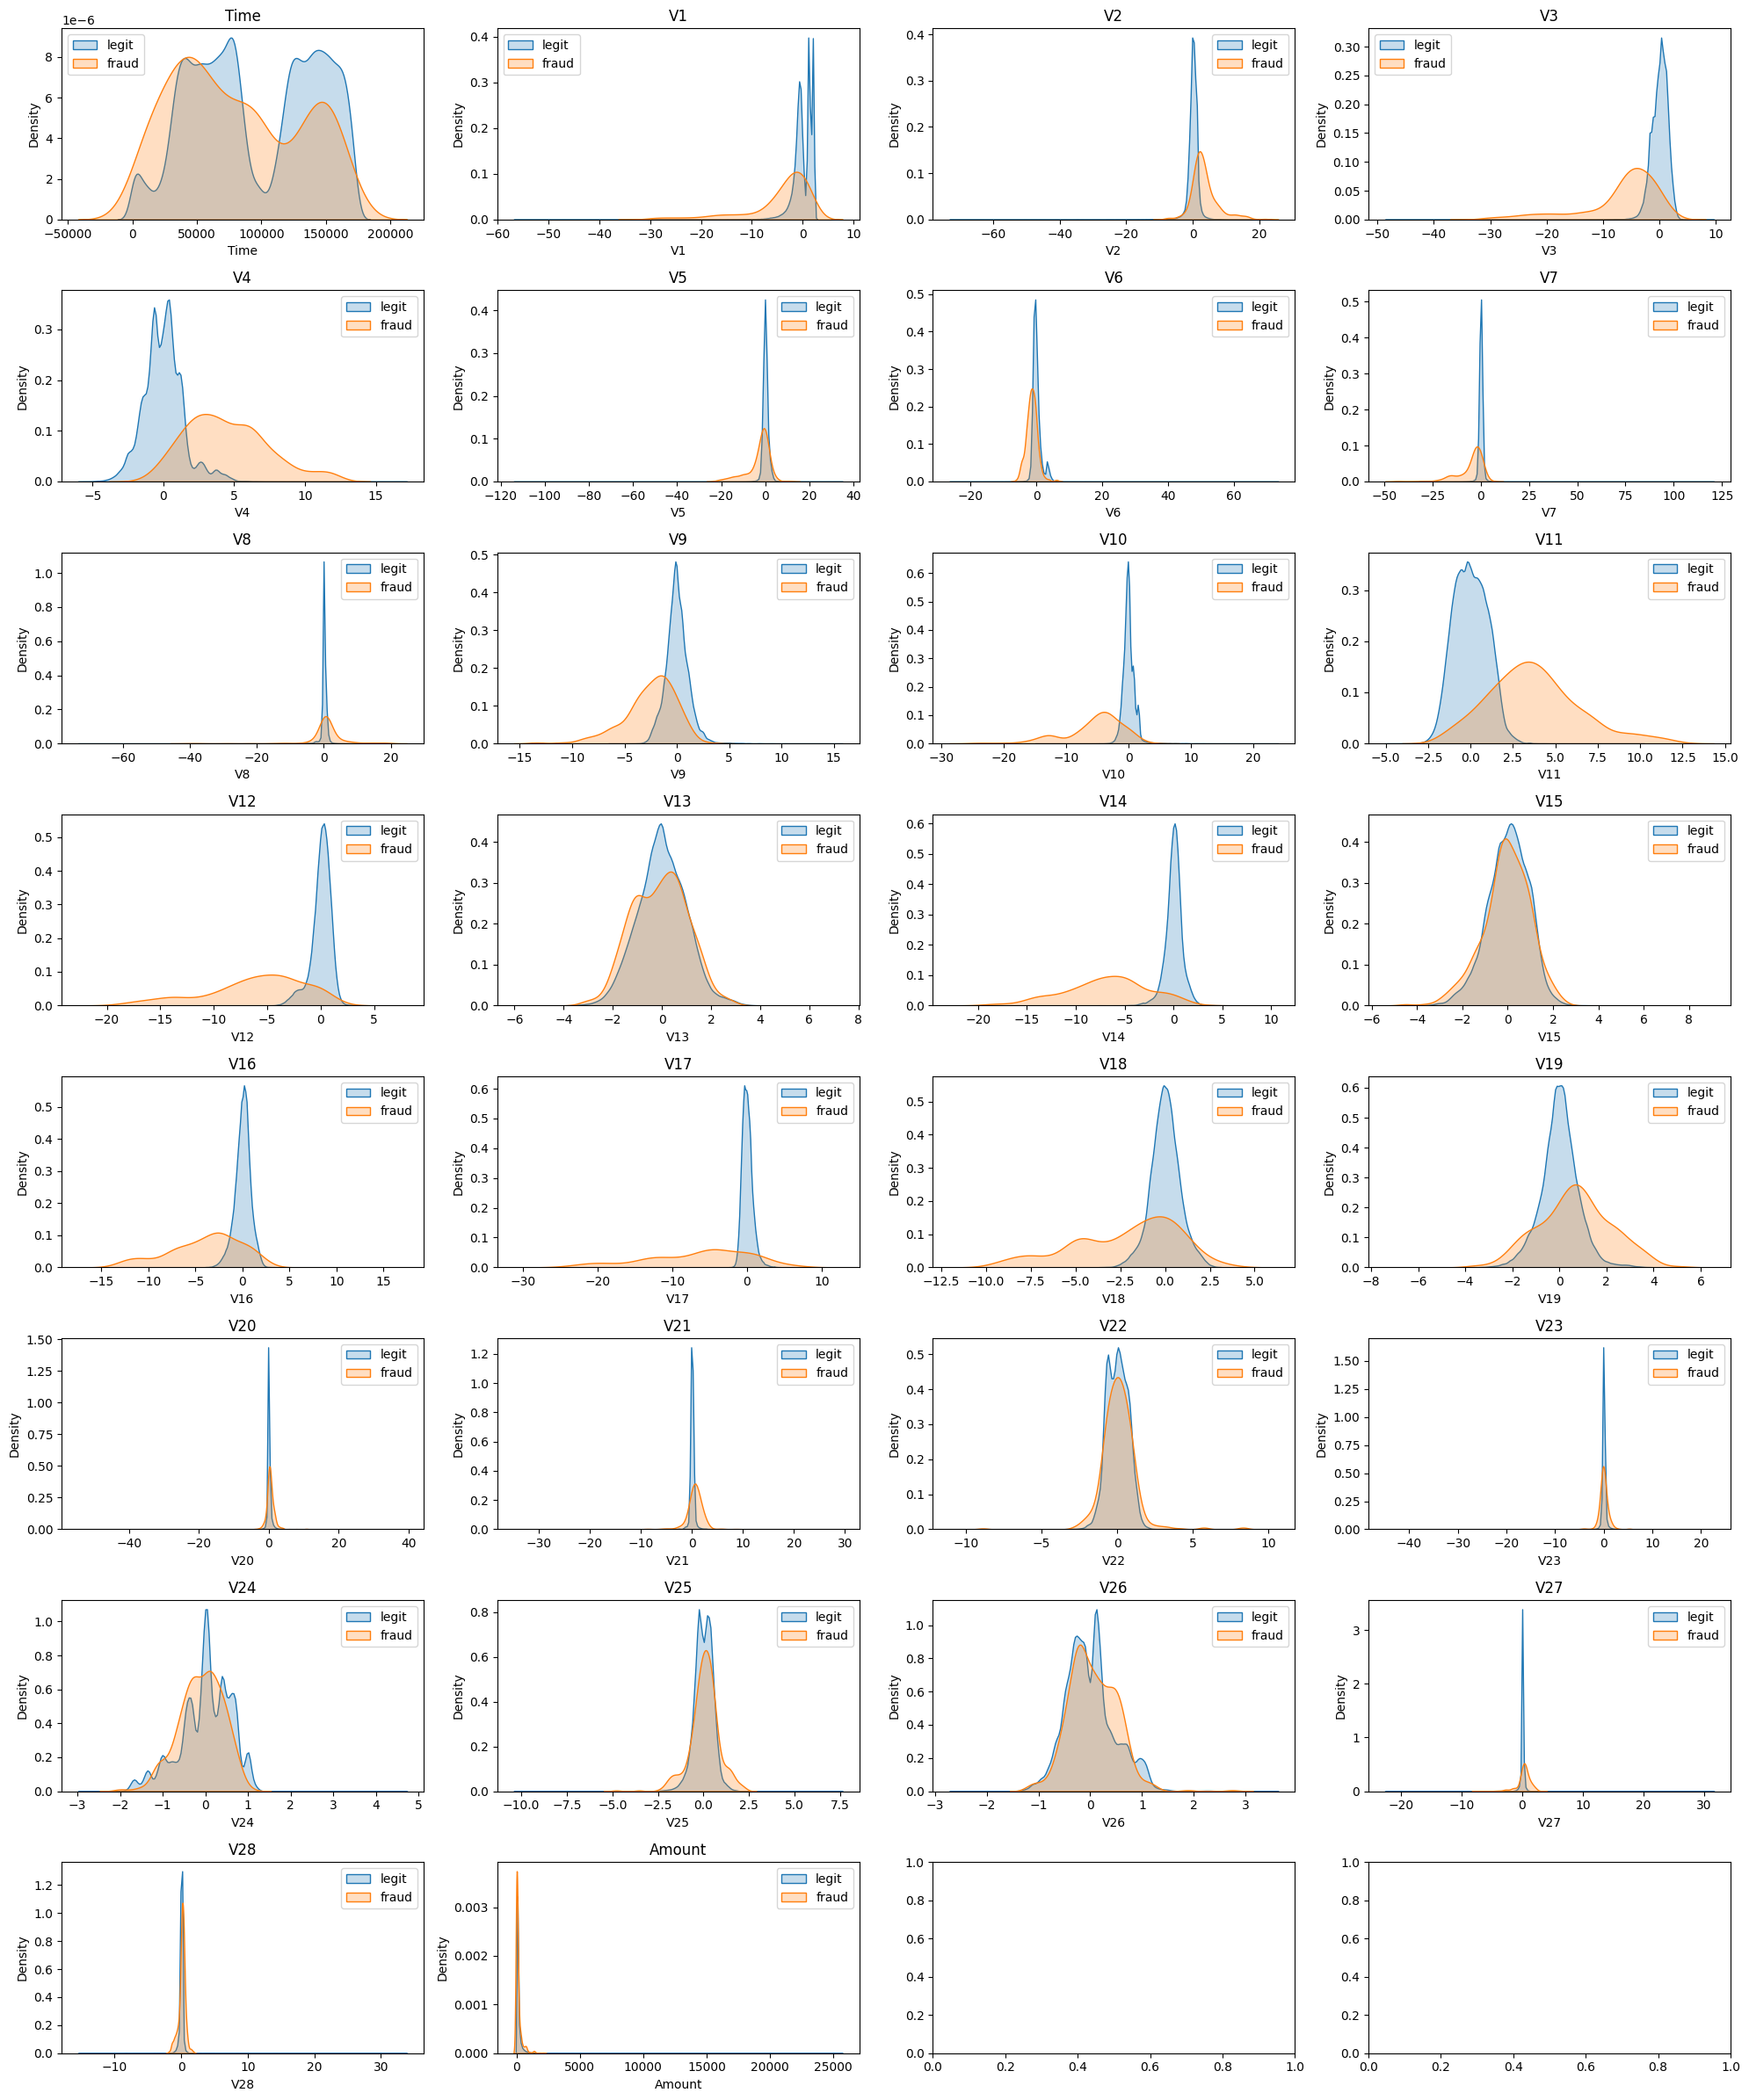

In [14]:
# Univariate seperation

num_cols = 4
num_rows = -(-len(numeric_feats) // num_cols) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*5, num_rows*3))
axes = axes.flatten()

# Loop through features
for i, col in enumerate(numeric_feats):
    ax = axes[i]
    sns.kdeplot(data.loc[data.Class == 0, col], label="legit", fill=True, ax=ax)
    sns.kdeplot(data.loc[data.Class == 1, col], label="fraud", fill=True, ax=ax)
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()


In [15]:
# Check correlation
numeric_data = data.select_dtypes(include=[np.number])

corr = numeric_data.corrwith(data["Class"]).abs().sort_values(ascending=False)

for feature, correlation in corr.items():
    if correlation < 0.1:
        print(f"{feature}: {correlation:.4f}")

V1: 0.0945
V9: 0.0940
V5: 0.0878
V2: 0.0846
V6: 0.0439
V19: 0.0336
V8: 0.0331
V21: 0.0264
V27: 0.0219
V20: 0.0215
hour: 0.0124
Time: 0.0124
V28: 0.0097
V24: 0.0072
V23: 0.0063
Amount: 0.0058
day: 0.0055
V22: 0.0049
V26: 0.0043
V13: 0.0039
V15: 0.0033
V25: 0.0032


In [16]:
# Inter-feature colinearity
X = data[numeric_feats].dropna()
vif = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)
vif.sort_values(ascending=False)

Amount    11.650240
V2         3.903164
V5         2.757256
V7         2.504461
Time       2.352783
V20        2.239605
V1         1.624955
V6         1.528109
V3         1.256154
V23        1.154552
V4         1.141139
V10        1.114508
V21        1.100434
V8         1.098777
V22        1.083646
V19        1.038012
V11        1.029512
V14        1.027096
V9         1.019334
V15        1.014514
V25        1.013613
V12        1.012571
V27        1.010059
V18        1.007009
V17        1.005537
V13        1.003473
V28        1.001721
V16        1.000847
V24        1.000682
V26        1.000516
dtype: float64

In [ ]:
# Logistic regression p-values
features = data.select_dtypes(include='number').columns.drop('Class')

pvals = {}
for feat in features:
    X = sm.add_constant(data[feat])
    y = data['Class']
    model = sm.Logit(y, X).fit(disp=False)
    pvals[feat] = model.pvalues[feat]

pvals_df = pd.Series(pvals, name='p-value').sort_values()
print(pvals_df)


V12        0.000000e+00
V18        0.000000e+00
V2         0.000000e+00
V3         0.000000e+00
V4         0.000000e+00
V14        0.000000e+00
V11        0.000000e+00
V7         0.000000e+00
V16        0.000000e+00
V9         0.000000e+00
V10        0.000000e+00
V17       1.508984e-252
V1        1.579761e-229
V5        2.690917e-178
V6         2.049653e-98
V8         3.605942e-85
V19        4.563165e-79
V21        5.108104e-37
V27        1.019758e-20
V20        1.264031e-18
hour       6.791204e-11
Time       7.052806e-11
V28        1.247867e-05
V24        1.232872e-04
V23        3.114954e-04
Amount     2.216800e-03
day        3.792924e-03
V22        9.035767e-03
V26        2.306124e-02
V13        3.789236e-02
V15        7.881079e-02
V25        8.741189e-02
Name: p-value, dtype: float64


### Tier 1 Features
- V2, V3, V4: Large mean shift in fraud curves and very small p-values
- V11, V12, V14: KDE curves shift right for fraud; all p ≈ 0, VIF ~1
- V16, V17, V18: Fraud densities sit far into negative tails; p ≈ 0
- V7, V10: Smaller separation but p ≈ 0 and low VIF

### Tier 2 Features
- V1, V5, V6, V8, V9: p ≪ 0.001; KDEs show subtle shifts in tails
- V19, V21: Fraud densities clearly fatter in one tail; VIF < 3
- V27, V28: thin but distinct fraud bump; p < 10-4
- Hour, Time: Low r but highly significant (p ≈ 7 × 10-11) → temporal fraud clusters

### Tier 3 Features
- V20, V22, V23, V24, V26: p < 0.001–0.0001, minimal curve shift; may interact with Tier-1 features
- V13: Borderline (p ≈ 0.04) — keep for trees, optional for regularised logistic
- Time-derived “day”: r very low, p tiny → captures weekly drift; fine for non-linear models

### Tier 4 Features
- V15: p ≈ 0.08 (> 0.05). Adds noise in logistic. Trees will auto-down-weight so harmless there.
- V25: p ≈ 0.087; KDE almost overlaps; minimal signal.
- Amount: VIF ≈ 11.7 — borderline multicollinearity. Still very informative for fraud, so: 